# Zeeman shift for SrF molecule

In [1]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pandas
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from diatomic import hyperfine_hamiltonian_no_field, Zeeman_hamiltonian, SrFConstants, sort_eigenstates

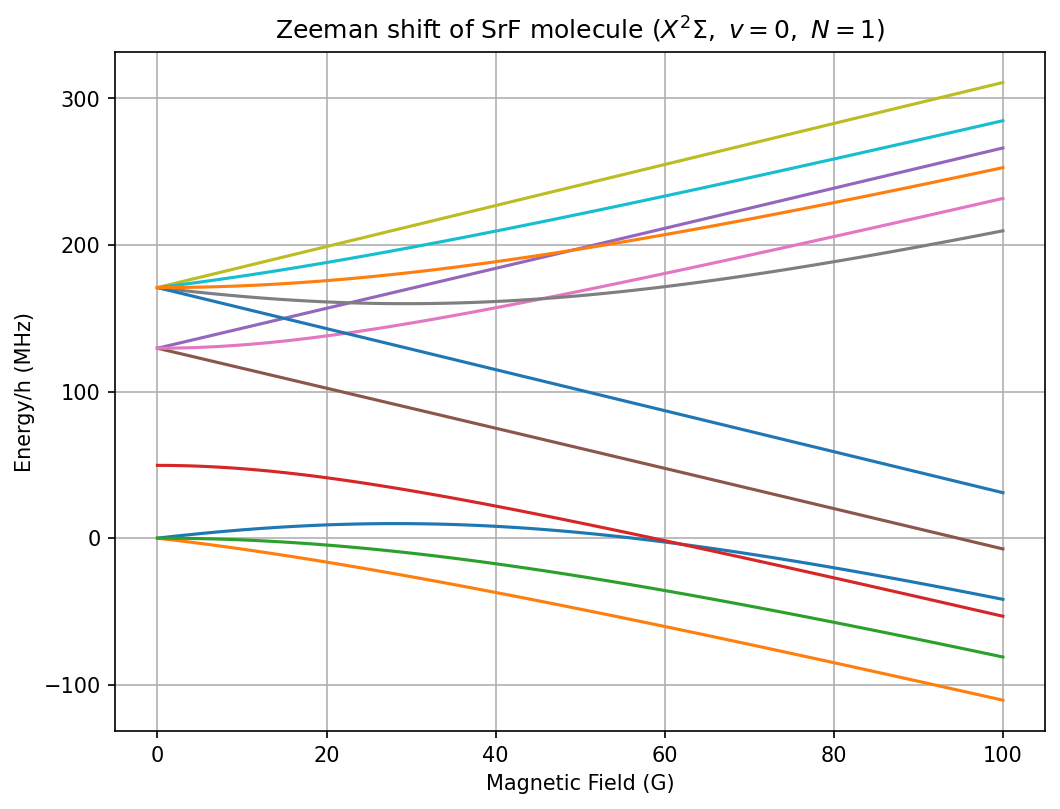

In [2]:
Nmax = 1
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian
Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, 1])) # generate Zeeman hamiltonian for unit magnetic field

Bz_list = np.linspace(0, 100, 100) # Gauss, generate a list of B field
energies_list = np.empty((len(Bz_list), H0.shape[0]), dtype=np.complex_)
states_list = np.empty((len(Bz_list), H0.shape[0], H0.shape[0]), dtype=np.complex_)
for i, Bz in enumerate(Bz_list):
    H = H0 + Hz * Bz
    energies, states = eigh(H) # diagonalize matrix
    energies_list[i] = energies/1e6
    states_list[i] = states

energies_list, states_list = sort_eigenstates(energies_list, states_list)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, np.real(energies_list[:, 4:16]-energies_list[0, 4])) # plot N=1 states

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1$)")
plt.grid()
plt.show()


## Compared to John Barry's thesis Fig 2.5

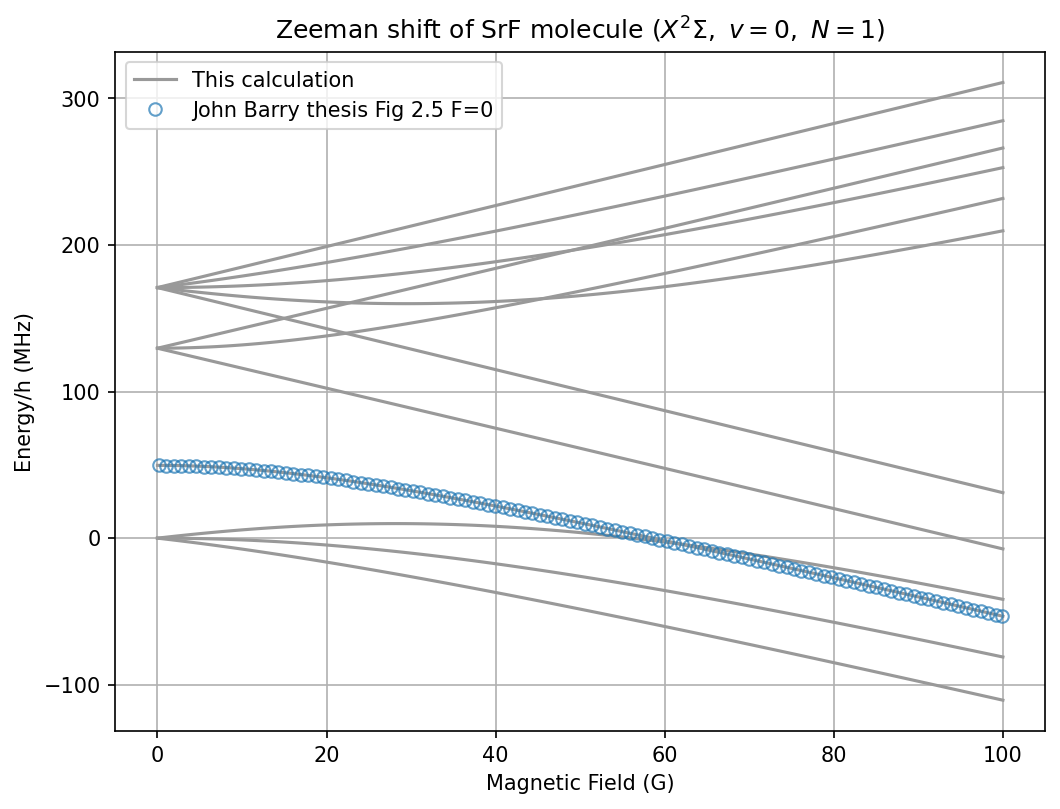

In [3]:
Nmax = 1
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian
Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, 1])) # generate Zeeman hamiltonian for unit magnetic field

Bz_list = np.linspace(0, 100, 100) # Gauss, generate a list of B field
energies_list = np.empty((len(Bz_list), H0.shape[0]), dtype=np.complex_)
states_list = np.empty((len(Bz_list), H0.shape[0], H0.shape[0]), dtype=np.complex_)
for i, Bz in enumerate(Bz_list):
    H = H0 + Hz * Bz
    energies, states = eigh(H) # diagonalize matrix
    energies_list[i] = energies/1e6
    states_list[i] = states

energies_list, states_list = sort_eigenstates(energies_list, states_list)

df = pandas.read_csv('JohnBarryThesisFig2p5DataForZeemanShift.csv') # John Barry's calculation of Zeeman shift (thesis Fig 2.5)
df['Energy (MHz)'] -= df['Energy (MHz)'][0] # remove energy offset
df['Energy (MHz)'] += np.real(energies_list[0][7]-energies_list[0][4]) # add energy offset

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.plot(Bz_list, np.real(energies_list[:, 4:16]-energies_list[0, 4]), color ='#999999', label='This calculation')
ax.plot(df['B field (G)'], df['Energy (MHz)'], 'o', markerfacecolor='none', alpha=0.7, label="John Barry thesis Fig 2.5 F=0")

handles, labels = ax.get_legend_handles_labels()
display = (0,12)

ax.set_ylabel("Energy/h (MHz)")
ax.set_xlabel("Magnetic Field (G)")
ax.set_title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1$)")
ax.legend([handle for i,handle in enumerate(handles) if i in display],
            [label for i,label in enumerate(labels) if i in display], loc = 'best')

plt.grid()
plt.show()